In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('sensor_data(2).csv')

In [6]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   object 
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [8]:
df['Timestamps']=pd.to_datetime(df['Timestamp'])

In [9]:
df['year']=df['Timestamps'].apply(lambda x: x.year)
df['month']=df['Timestamps'].apply(lambda x: x.month)
df['day']=df['Timestamps'].apply(lambda x: x.day)

In [10]:
df['day'].unique()

array([23, 30,  3,  4, 13, 22, 12, 15, 18, 21, 10, 24, 20,  8,  1, 25,  6,
        2, 17,  9, 29, 19, 16,  5, 27, 26, 14,  7, 11, 28], dtype=int64)

In [11]:
df['time']=df['Timestamps'].apply(lambda x:x.time)

In [12]:
df.drop('time',axis=1,inplace=True)

In [13]:
df

,Timestamp,Boiler Name,Temperature,Anomaly,Timestamps,year,month,day
0,2023-01-23 00:58:20,Boiler A,20.180428,0,2023-01-23 00:58:20,2023,1,23
1,2023-01-30 06:30:08,Boiler A,23.372948,0,2023-01-30 06:30:08,2023,1,30
2,2023-01-03 10:47:23,Boiler A,29.858208,0,2023-01-03 10:47:23,2023,1,3
3,2023-01-03 17:10:50,Boiler C,20.564032,0,2023-01-03 17:10:50,2023,1,3
4,2023-01-04 17:50:22,Boiler D,23.547024,0,2023-01-04 17:50:22,2023,1,4
...,...,...,...,...,...,...,...,...
995,2023-01-11 23:39:44,Boiler A,27.596447,0,2023-01-11 23:39:44,2023,1,11
996,2023-01-25 01:22:21,Boiler B,19.189359,0,2023-01-25 01:22:21,2023,1,25
997,2023-01-02 03:47:51,Boiler A,17.157156,0,2023-01-02 03:47:51,2023,1,2
998,2023-01-07 09:21:22,Boiler B,23.135241,0,2023-01-07 09:21:22,2023,1,7


In [14]:
df['time'] = df['Timestamps'].dt.strftime('%H:%M:%S')

In [15]:
df.drop('Timestamp',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Boiler Name  1000 non-null   object        
 1   Temperature  1000 non-null   float64       
 2   Anomaly      1000 non-null   int64         
 3   Timestamps   1000 non-null   datetime64[ns]
 4   year         1000 non-null   int64         
 5   month        1000 non-null   int64         
 6   day          1000 non-null   int64         
 7   time         1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 62.6+ KB


In [17]:
Boiler_A=df[df['Boiler Name']=='Boiler A']

In [18]:
Boiler_A

,Boiler Name,Temperature,Anomaly,Timestamps,year,month,day,time
0,Boiler A,20.180428,0,2023-01-23 00:58:20,2023,1,23,00:58:20
1,Boiler A,23.372948,0,2023-01-30 06:30:08,2023,1,30,06:30:08
2,Boiler A,29.858208,0,2023-01-03 10:47:23,2023,1,3,10:47:23
7,Boiler A,31.072207,0,2023-01-03 23:55:50,2023,1,3,23:55:50
10,Boiler A,17.730624,0,2023-01-15 08:13:08,2023,1,15,08:13:08
...,...,...,...,...,...,...,...,...
979,Boiler A,29.691812,0,2023-01-07 16:19:51,2023,1,7,16:19:51
987,Boiler A,31.184915,0,2023-01-18 23:03:26,2023,1,18,23:03:26
991,Boiler A,29.588888,0,2023-01-21 00:09:45,2023,1,21,00:09:45
995,Boiler A,27.596447,0,2023-01-11 23:39:44,2023,1,11,23:39:44


<Axes: xlabel='Timestamps', ylabel='Temperature'>

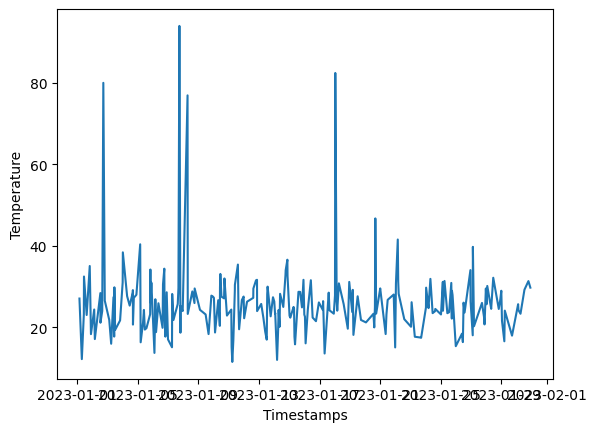

In [15]:
sns.lineplot(data=Boiler_A,x=Boiler_A['Timestamps'],y=Boiler_A['Temperature'])

In [16]:
import plotly.express as px

<Axes: xlabel='Temperature', ylabel='Count'>

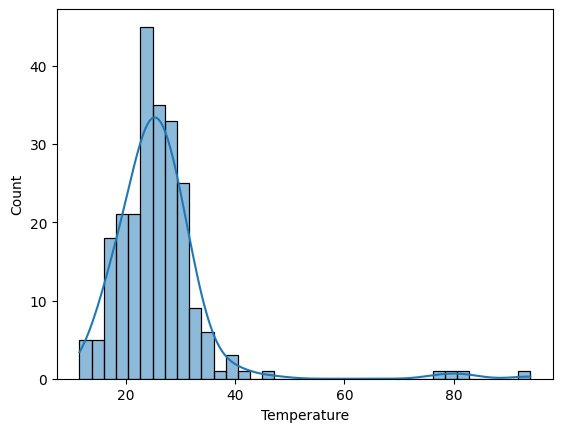

In [28]:
sns.histplot(Boiler_A['Temperature'],kde=True)

In [18]:
fig = px.line(Boiler_A, x="Timestamps", y="Temperature",  color='Anomaly',title='Temperature with time series')
fig.show()

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-readmission-project\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [34]:
Boiler_B=df[df['Boiler Name']=='Boiler B']

In [35]:
Boiler_B

,Boiler Name,Temperature,Anomaly,Timestamps,year,month,day,time
5,Boiler B,26.148815,0,2023-01-13 03:22:52,2023,1,13,03:22:52
15,Boiler B,23.956412,0,2023-01-22 10:00:15,2023,1,22,10:00:15
19,Boiler B,30.343984,0,2023-01-08 18:53:25,2023,1,8,18:53:25
24,Boiler B,20.994362,0,2023-01-02 09:14:57,2023,1,2,09:14:57
27,Boiler B,23.635175,0,2023-01-09 00:21:00,2023,1,9,00:21:00
...,...,...,...,...,...,...,...,...
986,Boiler B,18.318934,0,2023-01-30 19:03:14,2023,1,30,19:03:14
989,Boiler B,17.132840,0,2023-01-30 05:32:40,2023,1,30,05:32:40
993,Boiler B,24.703846,0,2023-01-09 02:54:02,2023,1,9,02:54:02
996,Boiler B,19.189359,0,2023-01-25 01:22:21,2023,1,25,01:22:21


<Axes: xlabel='Temperature', ylabel='Count'>

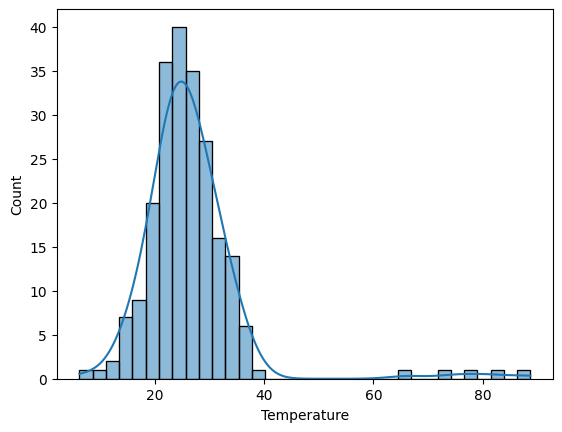

In [29]:
sns.histplot(Boiler_B['Temperature'],kde=True)

In [21]:
fig = px.line(Boiler_B, x="Timestamps", y="Temperature",  color='Anomaly',title='Temperature with time series')
fig.show()

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-readmission-project\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [39]:
Boiler_C=df[df['Boiler Name']=='Boiler C']

<Axes: xlabel='Temperature', ylabel='Count'>

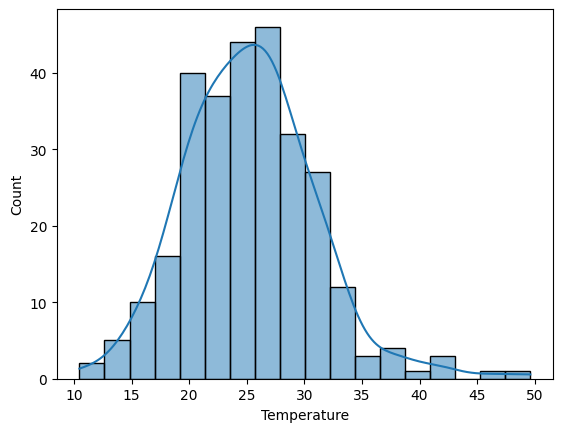

In [30]:
sns.histplot(Boiler_C['Temperature'],kde=True)

In [23]:
fig = px.line(Boiler_C, x="Timestamps", y="Temperature",  color='Anomaly',title='Temperature with time series')
fig.show()

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-readmission-project\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [42]:
Boiler_D=df[df['Boiler Name']=='Boiler D']

<Axes: xlabel='Temperature', ylabel='Count'>

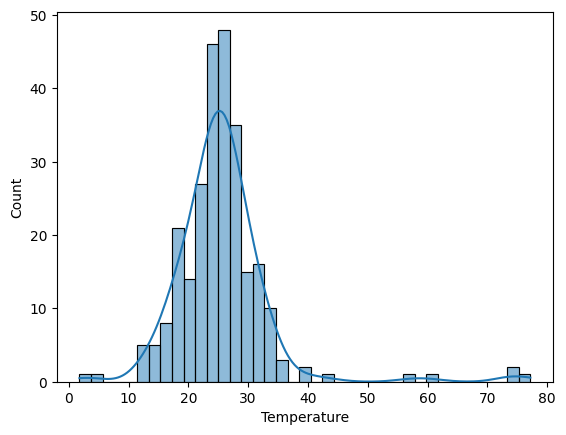

In [31]:
sns.histplot(Boiler_D['Temperature'],kde=True)

In [25]:
fig = px.line(Boiler_D, x="Timestamps", y="Temperature",  color='Anomaly',title='Temperature with time series')
fig.show()

c:\Users\rames\OneDrive\Desktop\guvi-ds\Hospital-readmission-project\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Axes: >

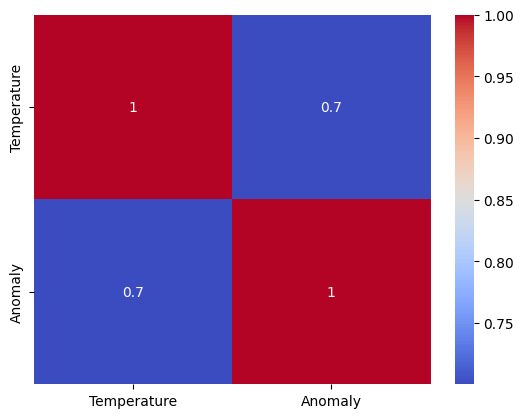

In [37]:
sns.heatmap(df[['Temperature','Anomaly']].corr(),cmap='coolwarm',annot=True)

In [25]:
gp_temp=df.groupby('Boiler Name')['Temperature'].mean().reset_index()

In [26]:
gp_temp

,Boiler Name,Temperature
0,Boiler A,26.050186
1,Boiler B,26.479295
2,Boiler C,25.284211
3,Boiler D,25.548983


In [28]:
import plotly.express as px
fig = px.bar(gp_temp, x='Boiler Name', y='Temperature')
fig.show()

In [32]:
boiler_A_anomoly=Boiler_A[Boiler_A['Anomaly']==1]

In [36]:
boiler_B_anomoly=Boiler_B[Boiler_B['Anomaly']==1]

In [40]:
boiler_C_anomoly=Boiler_C[Boiler_C['Anomaly']==1]

In [43]:
boiler_D_anomoly=Boiler_D[Boiler_D['Anomaly']==1]

In [45]:
fp=pd.concat([boiler_A_anomoly,boiler_B_anomoly,boiler_C_anomoly,boiler_D_anomoly])

In [51]:
fig = px.line(fp,y="Temperature", color='Boiler Name')
fig.show()

In [40]:
Boiler_A

,Boiler Name,Temperature,Anomaly,Timestamps,year,month,day,time
0,Boiler A,20.180428,0,2023-01-23 00:58:20,2023,1,23,00:58:20
1,Boiler A,23.372948,0,2023-01-30 06:30:08,2023,1,30,06:30:08
2,Boiler A,29.858208,0,2023-01-03 10:47:23,2023,1,3,10:47:23
7,Boiler A,31.072207,0,2023-01-03 23:55:50,2023,1,3,23:55:50
10,Boiler A,17.730624,0,2023-01-15 08:13:08,2023,1,15,08:13:08
...,...,...,...,...,...,...,...,...
979,Boiler A,29.691812,0,2023-01-07 16:19:51,2023,1,7,16:19:51
987,Boiler A,31.184915,0,2023-01-18 23:03:26,2023,1,18,23:03:26
991,Boiler A,29.588888,0,2023-01-21 00:09:45,2023,1,21,00:09:45
995,Boiler A,27.596447,0,2023-01-11 23:39:44,2023,1,11,23:39:44


In [80]:
X1=Boiler_A['Temperature']
y1=Boiler_A['Anomaly']

In [81]:
y1

0      0
1      0
2      0
7      0
10     0
      ..
979    0
987    0
991    0
995    0
997    0
Name: Anomaly, Length: 233, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

In [57]:
smote=SMOTE(sampling_strategy='minority')


In [82]:
X1=X1.values.reshape(-1, 1)

In [83]:
X_sm, y_sm = smote.fit_resample(X1, y1)


In [60]:
f=pd.DataFrame(X_sm,y_sm,columns=['Temp'])

In [61]:
f=f.reset_index()

In [72]:
f[f['Anomaly']==1].max()

Anomaly     1.000000
Temp       94.007501
dtype: float64

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
clf=LogisticRegression()

In [86]:
clf.fit(X_sm,y_sm)

LogisticRegression()

In [87]:
clf.score(X_sm,y_sm)

0.9977876106194691

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.4,random_state=50)

In [90]:
clf.fit(X_train,y_train)

LogisticRegression()

In [91]:
predictions=clf.predict(X_test)

In [92]:
from sklearn import metrics

In [93]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        84

    accuracy                           0.99       181
   macro avg       0.99      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



In [94]:
pred=clf.predict([[39]])

In [95]:
check=list(pred)

In [96]:
if check[0]==1:
    print("Anomoly")
else:
    print("Normal")

Anomoly


In [99]:
from sklearn.svm import SVC

In [100]:
clf=SVC()

In [101]:
clf.fit(X_train,y_train)

SVC()

In [102]:
predictions=clf.predict(X_test)

In [103]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      0.99        84

    accuracy                           0.99       181
   macro avg       0.99      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



In [145]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
labels = db.labels_
labels_true=y

In [146]:
list(labels).count(-1)

29

In [147]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 29


In [148]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.490
Completeness: 0.176
V-measure: 0.259
Adjusted Rand Index: 0.318
Adjusted Mutual Information: 0.252
Silhouette Coefficient: 0.602


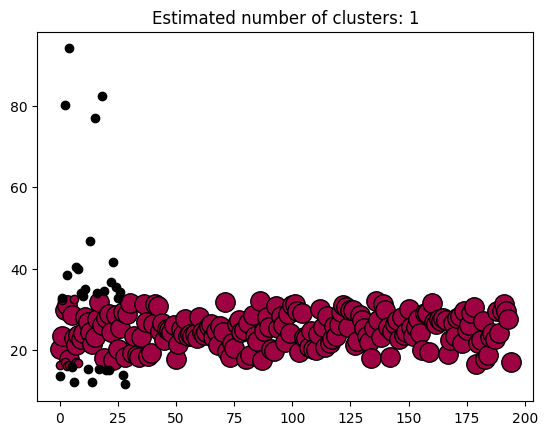

In [149]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [155]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X_sm)
labels = db.labels_
labels_true=y_sm

In [156]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 138


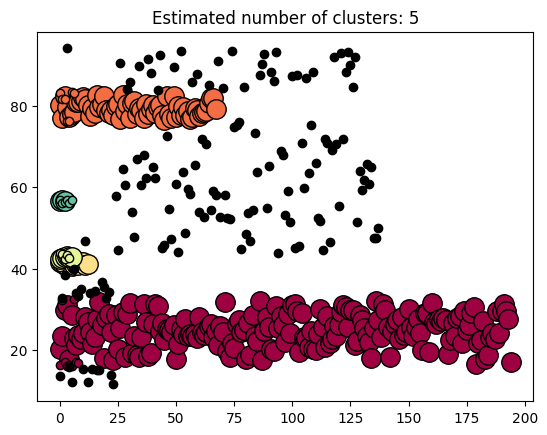

In [158]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_sm[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_sm[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [195]:
X=Boiler_B['Temperature']
y=Boiler_B['Anomaly']

In [196]:
y.value_counts()

Anomaly
0    215
1      5
Name: count, dtype: int64

In [197]:
smote=SMOTE(sampling_strategy='minority')

In [198]:
X=X.values.reshape(-1, 1)

In [199]:
X

array([[26.14881455],
       [23.95641211],
       [30.34398382],
       [20.99436151],
       [23.63517522],
       [21.05728052],
       [31.67375595],
       [22.72400093],
       [23.53926488],
       [31.82549989],
       [18.91977355],
       [21.18212283],
       [22.08989049],
       [29.67245287],
       [24.2217825 ],
       [26.48313889],
       [23.57366756],
       [26.30230834],
       [26.71169414],
       [27.43630435],
       [19.08413354],
       [22.82289596],
       [30.54798882],
       [88.68052433],
       [82.41640159],
       [29.60045619],
       [29.67073366],
       [78.08339125],
       [28.01788261],
       [24.22711582],
       [19.82755899],
       [32.04525572],
       [26.55642927],
       [28.44134497],
       [33.57019651],
       [20.40107928],
       [73.84094709],
       [33.00167975],
       [23.03342986],
       [21.89319821],
       [34.63104328],
       [23.58222825],
       [25.20313003],
       [31.43971712],
       [31.71453114],
       [25

In [200]:
xr, yr = SMOTE(k_neighbors=3).fit_resample(X, y)

In [201]:
X_train,X_test,y_train,y_test=train_test_split(xr,yr,test_size=0.4,random_state=50)

In [202]:
clf=SVC()

In [203]:
clf.fit(X_train,y_train)

SVC()

In [204]:
predictions=clf.predict(X_test)

In [205]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        74

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [209]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
labels = db.labels_
labels_true=y

In [210]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 27


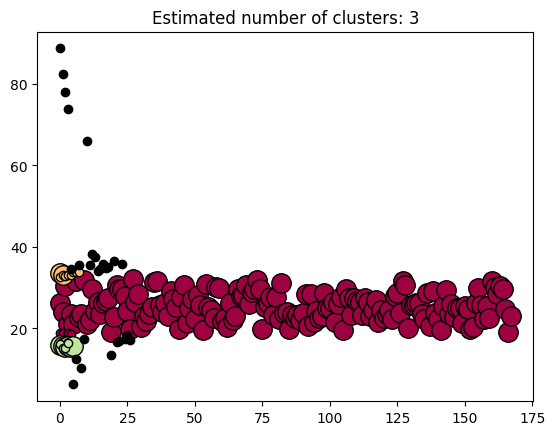

In [218]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [220]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(xr)
labels = db.labels_
labels_true=yr

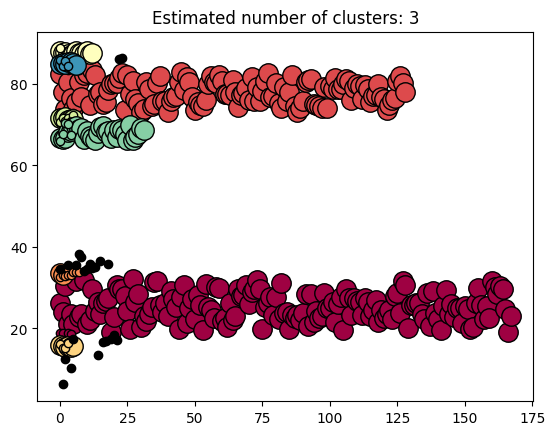

In [222]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = xr[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = xr[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [245]:
clf.predict([[51.6]])

array([1], dtype=int64)

In [9]:
df.iloc[3,:]

Timestamp      2023-01-03 17:10:50
Boiler Name               Boiler C
Temperature              20.564032
Anomaly                          0
Name: 3, dtype: object